# Handling Missing Values in 'Travel' Dataset by Jyoti Pandey
In this Notebook:
- ### [**Fixing Data based on Rows**](#fixing-data-based-on-rows)

- ### [**Fixing Data based on Columns**](#fixing-data-based-on-columns)


> ### Introduction to Missing Values in Dataset:

- Reasons of missing values: people hesitate to put down the information, error in the data, survey data is not that valid.
- Types of missing data: 
    1. Missing Completely at Random (MCAR)- A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.
    2. Missing Data Not At Random(MNAR): Systematic missing Values. There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.
- Types of data : numerical(continous and discrete), categorical data
    - When dealing with missing data, data scientists can use two primary methods to solve the error: imputation or the removal of data.
     - The **imputation method** develops reasonable guesses for missing data. It’s most useful when the percentage of missing data is **low**. If the portion of missing data is too high, the results lack natural variation that could result in an effective model.
     - The other option is to remove data. When dealing with data that is missing at random, related data can be deleted to reduce bias. Removing data may not be the best option if there are not enough observations to result in a reliable analysis. In some situations, observation of specific events or factors may be required.
    - Create a sepearate model for handling missing data. It consume more time and efforts. Regression and Classification algorithms as models.


> ### [Handling Missing Values in Categorical Variable:](#how-to-handle-categroical-missing-values) 
1. If less number of records are having missing values then only delete the records.
2. **Replace with the most frequent values** but this may also lead to imbalance data. 
- Advantages: Easy To implement, Fater way to implement. 
- Disadvantages: Since we are using the more frequent labels, it may use them in an over respresented way, **if there are many nan's**. It distorts the relation of the most frequent label.
3. **Apply a classifier algorithm and predict the missing values.** Consider the feature with missing values as dependent variable and rest features as independent variables. consider the records having values in teh dependent variable as training data and with missing values as test data. build a model to predict the missing values test data.
4. **Apply unsupervised machine learning techniques.** Skip the column with missing values and traget column of the problem statement. Prepare the number of clusters equal to the number of categories in the features with missing values. 
5. [Capturing NAN values with a new feature](#adding-a-variable-to-capture-nan)
- It works well if the data are not missing completely at random
- Advantages: Easy to implement, Captures the importance of missing values
- Disadvantages: Creating Additional Features(Curse of Dimensionality)
        

    
> ### [Handling Missing Values in Continuous Variable:](#handling-continuous-feature-monthlyincome)
1. [Mean/ Median replacement](#fixing-data-based-on-columns)
          - **When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR).** We solve this by replacing the NAN with the most frequent occurance of the variables
          - If outlier present then apply median imputation
          - Advantages of Mean/Median Imputation
              - Easy to implement(Median Robust to outliers)
              - Faster way to obtain the complete dataset
          - Disadvantages
              - Change or Distortion in the original variance
              - Impacts Correlation
2. [Random Sample Imputation](#random-sampling-imputation)
          - Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values When should it be used? **It assumes that the data are missing completely at random(MCAR)**
          - Advantages: Easy To implement. There is less distortion in variance
          - Disadvantage: Every situation randomness wont work
3. [Capturing NAN values with a new feature](#capturing-nan-values-with-a-new-feature)
          - It works well if the data are not missing completely at random
          - Advantages: Easy to implement, Captures the importance of missing values
          - Disadvantages: Creating Additional Features(Curse of Dimensionality)
          
4. [End of Distribution imputation](#end-of-distribution-imputation)
          - If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable.
5. [Arbitrary imputation](#arbitrary-value-imputation)
          - This technique was derived from kaggle competition. It consists of replacing NAN by an arbitrary value
          - Advantages: Easy to implement, Captures the importance of missingess if there is one
          - Disadvantages: Distorts the original distribution of the variable, If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution, Hard to decide which value to use


> ### [Handling Missing Values in Discrete Variable:](#filling-values-depending-upon-the-domain-knowledge-handling-missing-values-in-discrete-variables)
1. Use domain knowledge to fill missing values. Eg. 'NumberOfChildrenVisiting' is missing meaning there are no children visiting sp replce it with zero.



> **Before deciding which approach to employ, data scientists must understand why the data is missing.**


**Reference**
- 2022 Python for Machine Learning and Data science Masterclass Course by Jose Portilla on Udemy
- Krish Naik YT Video: https://www.youtube.com/watch?v=q-DyjA8ZmYM&list=PLZoTAELRMXVPwYGE2PXD3x0bfKnR0cJjN&index=4
- https://www.mastersindatascience.org/learning/how-to-deal-with-missing-data/
- https://www.analyticsvidhya.com/blog/2021/04/how-to-handle-missing-values-of-categorical-variables/

In [142]:
# Importing Libraries
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### **Reading Dataset "Travel"**

In [161]:
dataset = pd.read_csv("Travel.csv")
# Finding the shape of dataset
print(f"There are {dataset.shape[0]} rows and {dataset.shape[1]} columns in the dataset 'Travel'\n")
dataset.head()

There are 4888 rows and 20 columns in the dataset 'Travel'



,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [162]:
# Finding the information about the dataset:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [184]:
# seperating the Numerical and Categorical Variables:
numerical_features = [fea for fea in dataset.columns if dataset[fea].dtype != 'O']
print("Numerical feature Count {}".format(len(numerical_features)))
print(numerical_features)
unique_feature=[feature for feature in numerical_features if len(dataset[feature].unique())==len(dataset)]
print("Unique feature Count {} out of {} features".format(len(unique_feature),len(numerical_features)))
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in unique_feature]
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+unique_feature]
print("Continuous feature Count {} out of {} features".format(len(continuous_feature),len(numerical_features)))
print(continuous_feature)
print("Discrete Variables Count: {} out of {} features".format(len(discrete_feature),len(numerical_features)))
print(discrete_feature)
data = dataset.copy()
pd.DataFrame(list(zip(discrete_feature,[len(data[feature].unique()) for feature in discrete_feature], [data[str(feature)].unique() for feature in discrete_feature])), columns=['Discrete Features','No of Unique Values', 'Unique Values'])



Numerical feature Count 14
['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome']
Unique feature Count 1 out of 14 features
Continuous feature Count 3 out of 14 features
['Age', 'DurationOfPitch', 'MonthlyIncome']
Discrete Variables Count: 10 out of 14 features
['ProdTaken', 'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting']


,Discrete Features,No of Unique Values,Unique Values
0,ProdTaken,2,"[1, 0]"
1,CityTier,3,"[3, 1, 2]"
2,NumberOfPersonVisiting,5,"[3, 2, 1, 4, 5]"
3,NumberOfFollowups,7,"[3.0, 4.0, 2.0, 5.0, nan, 1.0, 6.0]"
4,PreferredPropertyStar,4,"[3.0, 4.0, 5.0, nan]"
5,NumberOfTrips,13,"[1.0, 2.0, 7.0, 5.0, 6.0, 3.0, 4.0, 19.0, 21.0..."
6,Passport,2,"[1, 0]"
7,PitchSatisfactionScore,5,"[2, 3, 5, 4, 1]"
8,OwnCar,2,"[1, 0]"
9,NumberOfChildrenVisiting,5,"[0.0, 2.0, 1.0, nan, 3.0]"


In [185]:
categorical_features = [fea for fea in dataset.columns if dataset[fea].dtype == 'O']
print("Categorical feature Count {}".format(len(categorical_features)))
print(categorical_features)
data = dataset.copy()
pd.DataFrame(list(zip(categorical_features,[len(data[feature].unique()) for feature in categorical_features], [data[str(feature)].unique() for feature in categorical_features])), columns=['Categorical Features','No. of Categories', 'Categories'])

Categorical feature Count 6
['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


,Categorical Features,No. of Categories,Categories
0,TypeofContact,3,"[Self Enquiry, Company Invited, nan]"
1,Occupation,4,"[Salaried, Free Lancer, Small Business, Large ..."
2,Gender,3,"[Female, Male, Fe Male]"
3,ProductPitched,5,"[Deluxe, Basic, Standard, Super Deluxe, King]"
4,MaritalStatus,4,"[Single, Divorced, Married, Unmarried]"
5,Designation,5,"[Manager, Executive, Senior Manager, AVP, VP]"


In [186]:
# Checking Null values in dataset
dataset.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64



#### Creating a Function of Percentage of Data Missing in each Feature

In [187]:
# creating a function of percentage of data missing in each feature
def percentage_missing(df):
    """
    To find percentage of missing data in each feature
    """
    percentage_nan=0
    percentage_nan=100 * df.isnull().sum()/len(df)
    percentage_nan = percentage_nan[percentage_nan>0].sort_values(ascending=False)
    return percentage_nan

In [189]:
percent_nan = percentage_missing(data)
percent_nan
# positive percentage with missing values in dataset

DurationOfPitch             5.135025
MonthlyIncome               4.766776
Age                         4.623568
NumberOfTrips               2.864157
NumberOfChildrenVisiting    1.350245
NumberOfFollowups           0.920622
PreferredPropertyStar       0.531915
TypeofContact               0.511457
dtype: float64

In [190]:
# Continuous Features with percentage of Missing Values
percent_nan_cont = percentage_missing(data[continuous_feature])
percent_nan_cont

DurationOfPitch    5.135025
MonthlyIncome      4.766776
Age                4.623568
dtype: float64

In [191]:
# Discrete Features with percentage of missing values
percent_nan_disc = percentage_missing(data[discrete_feature])
percent_nan_disc

NumberOfTrips               2.864157
NumberOfChildrenVisiting    1.350245
NumberOfFollowups           0.920622
PreferredPropertyStar       0.531915
dtype: float64

In [192]:
# Categorical Features with percentage of missing values
percent_nan_cat = percentage_missing(data[categorical_features])
percent_nan_cat

TypeofContact    0.511457
dtype: float64

### **Fixing Data based on Rows**
#### It is always better to start from least percentage missing values to the higher.

The popular methods which are used by the machine learning community to handle the missing value for categorical variables in the dataset are as follows:
- Delete the observations (rows): If there is a large number of observations in the dataset, where all the classes to be predicted are sufficiently represented in the training data, then try deleting the missing value observations, which would not bring significant change in your feed to your model.
- Replace missing values with the most frequent value(mode): But in some cases, this strategy can make the data imbalanced wrt classes if there are a huge number of missing values present in our dataset.
-  Develop a model to predict missing values
-  Deleting the variable (Columns)
- Apply unsupervised Machine learning techniques


Text(0.5, 0, 'Features have Missing Values')

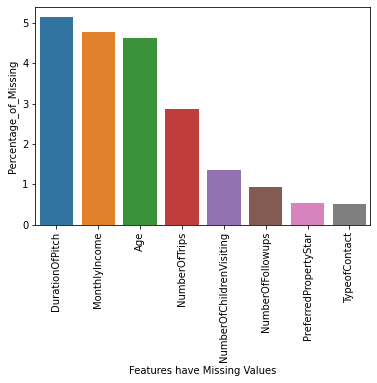

In [193]:
# visualizing missing values
sns.barplot(x=percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90);
plt.ylabel('Percentage_of_Missing')
plt.xlabel('Features have Missing Values')

#### Considering Features that have a Very Small Percentage Missing
- TypeofContact, PreferredPropertyStar, NumberOfFollowups and NumberOfChildrenVisiting have very small percentage missing
- Few rows so we can drop them or filling them with reasionable values.

Text(0.5, 0, 'Features have Missing Values')

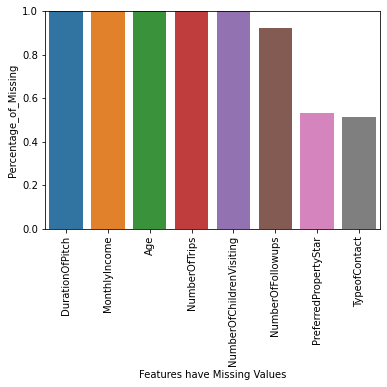

In [194]:
# visualizing missing values with y limit 0 to 1
sns.barplot(x=percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90);
# 1% of your data
plt.ylim(0,1) 
plt.ylabel('Percentage_of_Missing')
plt.xlabel('Features have Missing Values')
# its okay to drop  1% of 4888 rows.

In [195]:
percent_nan[percent_nan<1]
# three features are having less than 1 percentage of missing values

NumberOfFollowups        0.920622
PreferredPropertyStar    0.531915
TypeofContact            0.511457
dtype: float64

In [196]:
# dataset having null values at feature 'TypeofContact'
data[data['TypeofContact'].isnull()]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
224,200224,0,31.0,NaN,1,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Divorced,1.0,0,3,1,0.0,Manager,NaN
571,200571,0,26.0,NaN,1,NaN,Salaried,Female,3,5.0,Basic,3.0,Married,4.0,0,4,1,2.0,Executive,NaN
572,200572,0,29.0,NaN,1,NaN,Small Business,Female,3,3.0,Deluxe,3.0,Divorced,5.0,0,2,1,0.0,Manager,NaN
576,200576,0,27.0,NaN,3,NaN,Small Business,Male,2,3.0,Deluxe,3.0,Divorced,1.0,0,3,0,1.0,Manager,NaN
579,200579,0,34.0,NaN,1,NaN,Small Business,Female,2,4.0,Basic,5.0,Single,2.0,0,2,1,1.0,Executive,NaN
598,200598,1,28.0,NaN,1,NaN,Small Business,Male,2,3.0,Basic,3.0,Single,7.0,0,3,0,0.0,Executive,NaN
622,200622,0,32.0,NaN,3,NaN,Salaried,Male,3,3.0,Deluxe,3.0,Married,3.0,0,2,0,0.0,Manager,NaN
724,200724,0,24.0,NaN,1,NaN,Small Business,Female,2,4.0,Deluxe,3.0,Married,2.0,0,3,1,1.0,Manager,NaN
843,200843,0,26.0,NaN,1,NaN,Small Business,Male,2,1.0,Basic,3.0,Divorced,2.0,0,5,1,1.0,Executive,NaN
1021,201021,1,25.0,NaN,3,NaN,Salaried,Male,3,4.0,Basic,5.0,Divorced,4.0,0,1,1,0.0,Executive,NaN


- we observed that **'DurationOfPitch'** and **'MonthlyIncome'** are also having missing values where **'TypeofContact'** are missing

In [197]:
# dataset having null values at feature 'PreferredPropertyStar'
data[data['PreferredPropertyStar'].isnull()]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,200038,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,NaN,Divorced,1.0,1,2,1,0.0,Executive,95000.0
2609,202609,0,51.0,Self Enquiry,1,18.0,Salaried,Female,3,4.0,King,NaN,Single,5.0,0,5,1,1.0,VP,38604.0
2634,202634,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,King,NaN,Divorced,2.0,0,2,1,2.0,VP,38677.0
3012,203012,1,56.0,Self Enquiry,1,9.0,Small Business,Male,4,4.0,King,NaN,Divorced,7.0,1,2,1,3.0,VP,38537.0
3190,203190,0,42.0,Company Invited,1,14.0,Salaried,Female,3,6.0,King,NaN,Married,3.0,0,4,1,1.0,VP,38651.0
3193,203193,1,53.0,Self Enquiry,3,9.0,Small Business,Female,3,6.0,King,NaN,Divorced,3.0,0,3,1,1.0,VP,38523.0
3214,203214,0,47.0,Self Enquiry,1,7.0,Small Business,Male,3,4.0,King,NaN,Married,2.0,0,5,1,2.0,VP,38305.0
3295,203295,0,57.0,Self Enquiry,1,11.0,Large Business,Female,4,4.0,King,NaN,Married,6.0,0,4,0,3.0,VP,38621.0
3342,203342,0,44.0,Self Enquiry,1,10.0,Salaried,Male,4,6.0,King,NaN,Divorced,5.0,0,5,1,3.0,VP,38418.0
3362,203362,0,52.0,Company Invited,3,16.0,Salaried,Male,3,4.0,King,NaN,Married,6.0,1,4,1,2.0,VP,38525.0


- we observed that no other feature has missing values where **'PreferredPropertyStar'** is missing

In [198]:
# dataset having null values at feature 'PreferredPropertyStar'
data[data['NumberOfFollowups'].isnull()]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
79,200079,0,46.0,Self Enquiry,2,11.0,Small Business,Male,3,NaN,Deluxe,4.0,Married,1.0,1,5,0,1.0,Manager,20021.0
94,200094,0,32.0,Self Enquiry,3,12.0,Small Business,Male,2,NaN,Deluxe,3.0,Single,2.0,0,5,1,0.0,Manager,20010.0
96,200096,0,24.0,Self Enquiry,3,9.0,Salaried,Female,2,NaN,Deluxe,3.0,Divorced,1.0,0,4,1,0.0,Manager,19999.0
122,200122,1,56.0,Self Enquiry,1,20.0,Salaried,Female,3,NaN,Basic,4.0,Divorced,1.0,1,5,1,1.0,Executive,19963.0
135,200135,0,36.0,Self Enquiry,1,12.0,Small Business,Male,2,NaN,Deluxe,4.0,Married,7.0,0,4,1,1.0,Manager,19941.0
174,200174,0,45.0,Self Enquiry,3,10.0,Salaried,Female,1,NaN,Deluxe,5.0,Married,5.0,1,4,0,0.0,Manager,20006.0
317,200317,1,52.0,Self Enquiry,1,14.0,Small Business,Male,2,NaN,Deluxe,4.0,Divorced,3.0,0,2,1,1.0,Manager,19941.0
322,200322,0,32.0,Self Enquiry,1,8.0,Small Business,Female,3,NaN,Deluxe,3.0,Single,1.0,0,3,1,2.0,Manager,20055.0
376,200376,0,51.0,Self Enquiry,3,20.0,Salaried,Female,2,NaN,Deluxe,3.0,Divorced,5.0,0,3,0,1.0,Manager,19936.0
532,200532,0,47.0,Self Enquiry,3,20.0,Small Business,Male,2,NaN,Deluxe,5.0,Single,3.0,0,2,0,1.0,Manager,19960.0


- we observed that no other feature has missing values where **'NumberOfFollowups'** is missing

In [199]:
# dropping only those rows which are having missing values at 'TypeofContact'
data = data.dropna(axis=0,subset=['TypeofContact'])
# again checking the missing values through percent_missing function
percent_nan=percentage_missing(data)
percent_nan

Age                         4.647337
DurationOfPitch             4.647337
MonthlyIncome               4.277195
NumberOfTrips               2.878881
NumberOfChildrenVisiting    1.357187
NumberOfFollowups           0.925355
PreferredPropertyStar       0.534649
dtype: float64

Text(0.5, 0, 'Features have Missing Values')

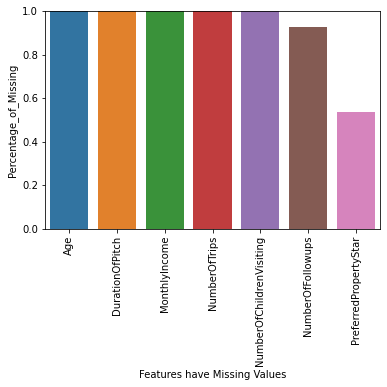

In [200]:
# visualizing missing values with y limit 0 to 1
sns.barplot(x=percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90);
# 1% of your data
plt.ylim(0,1) 
plt.ylabel('Percentage_of_Missing')
plt.xlabel('Features have Missing Values')

# Filling Values depending upon the Domain Knowledge: Handling Missing Values in Discrete Variables

[top](#handling-missing-values-in-travel-dataset-by-jyoti-pandey)

In [201]:
percent_nan_disc

NumberOfTrips               2.864157
NumberOfChildrenVisiting    1.350245
NumberOfFollowups           0.920622
PreferredPropertyStar       0.531915
dtype: float64

In [202]:
#  PreferredPropertyStar: unique values are [3.0, 4.0, 5.0, nan]  NUMERIC data, filling it with 0.0 : CONSIDERING NO PREFERRENCE as 0.0
data['PreferredPropertyStar'] = data['PreferredPropertyStar'].fillna(0.0)
# NumberOfFollowups:  unique values are  [3.0, 4.0, 2.0, 5.0, nan, 1.0, 6.0] NUMERIC data, filling it with 0.0: CONSIDERING NO FOLLOWUPS as 0.0
data['NumberOfFollowups'] = data['NumberOfFollowups'].fillna(0.0)
# NumberOfChildrenVisiting: unique values are [0.0, 2.0, 1.0, nan, 3.0] NUMERIC data, filling it with 0.0: CONSIDERING NO CHILD VISITED as 0.0
data['NumberOfChildrenVisiting'] = data['NumberOfChildrenVisiting'].fillna(0.0)
# NumberOfTrips:NUMERIC data, filling it with 0.0  : CONSIDERING NO TRIPS as 0.0
data['NumberOfTrips'] = data['NumberOfTrips'].fillna(0.0)         

In [203]:
percent_nan = percentage_missing(data)
percent_nan

Age                4.647337
DurationOfPitch    4.647337
MonthlyIncome      4.277195
dtype: float64

In [204]:
percent_nan_cat = percentage_missing(data[categorical_features])
percent_nan_cat

Series([], dtype: float64)

In [205]:
percent_nan_cont = percentage_missing(data[continuous_feature])
percent_nan_cont

Age                4.647337
DurationOfPitch    4.647337
MonthlyIncome      4.277195
dtype: float64

In [206]:
percent_nan_disc = percentage_missing(data[discrete_feature])
percent_nan_disc

Series([], dtype: float64)

Text(0.5, 0, 'Features have Missing Values')

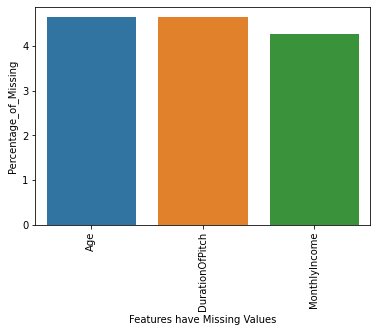

In [207]:
# visualizing missing values with y limit 0 to 1
sns.barplot(x=percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90);
plt.ylabel('Percentage_of_Missing')
plt.xlabel('Features have Missing Values')


- Everything is above 1%. It is not appropriate to drop this number of data. Now move towards Fixing missing Data based on Columns

## **Fixing Data based on Columns**
- Dropping the feature column is very simple to do,no longer need to worry about that feature in the future, potential to lose a feature with possible importanant signal and should consider drop feature approach when many rows are NaN.
- Filling in the missing feature data is potentially changing ground truth in data, must decide on reasionable estimation to filled value and must apply transformation to all future data for prediction. It needs domain knowledge information.
- There are few cases in which NaN implied Zero.

In [208]:
# data= data.drop(['FeatureNames'],axis=1) dropping columns if too much data is missing for that particular column
#data['Categorical_Feature'].value_count(),  data['Categorical_Feature']=data['Categorical_Feature'].fillna('None') 

# Handling Continuous Feature 'MonthlyIncome':

[top](#handling-missing-values-in-travel-dataset-by-jyoti-pandey)
1. Method 1: Filling values with grouped mean of monthly income based on designation
2. Method 2: Filling values with tyhe median value of the feature 'MonthlyIncome'


> Outcome: We are choosing method 1 as it performs better than method 2.

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Designation'>

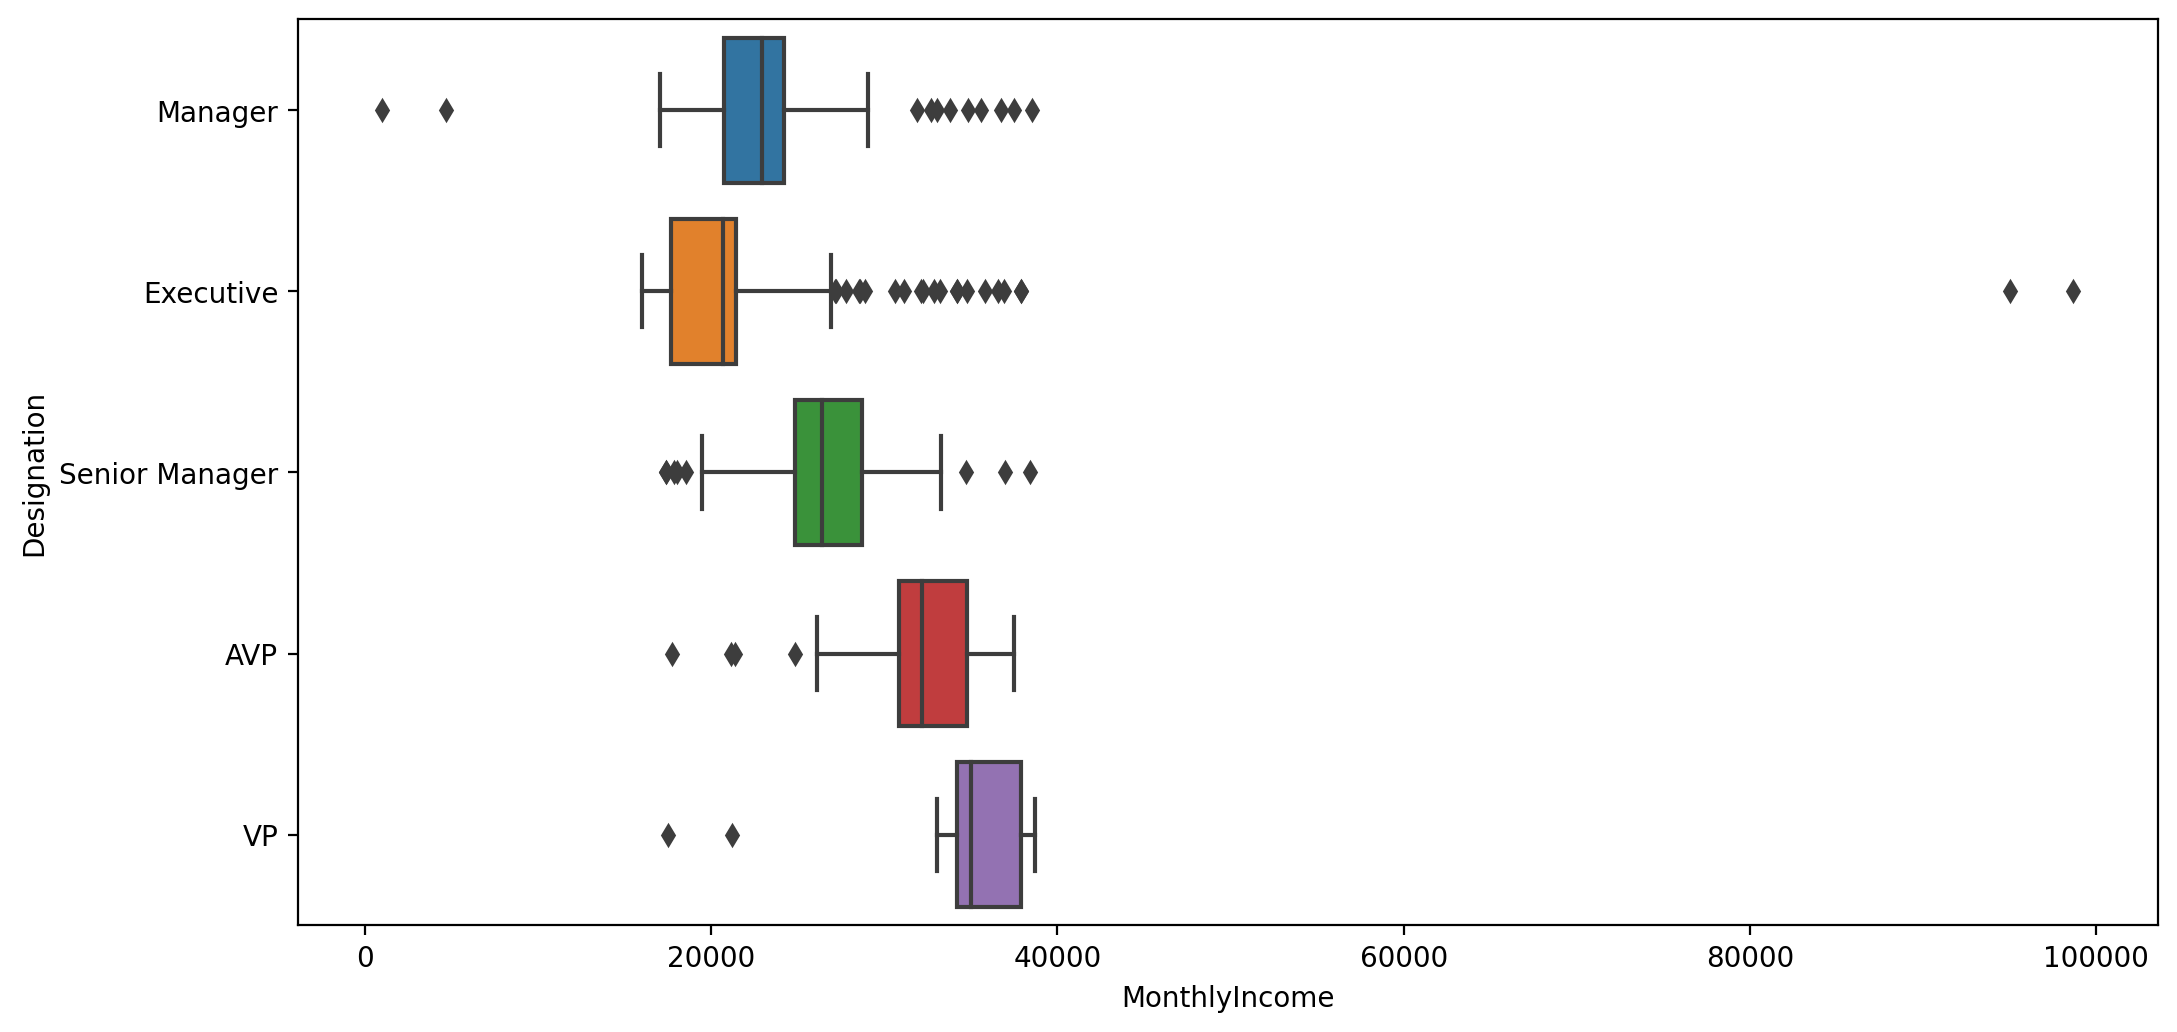

In [209]:
# NUMERIC FEATURE: MonthlyIncome vs 'Designation' 
plt.figure(figsize=(12,6), dpi= 200)
sns.boxplot(x='MonthlyIncome', y='Designation', data = data, orient='h')
# determining the relationship between designation and monthlyincome

## Filling in anything that was missing in monthlyincome for that particular designation.

In [210]:
data.groupby('Designation')['MonthlyIncome'].mean()

Designation
AVP               32241.046784
Executive         19939.922507
Manager           22643.157629
Senior Manager    26637.749326
VP                35878.947826
Name: MonthlyIncome, dtype: float64

In [211]:
# pandas transformation method: groupby call + apply method
data['MonthlyIncomeMean'] = data.groupby('Designation')['MonthlyIncome'].transform(lambda value: value.fillna(value.mean()))
data.head()
# filling in missing values in monthly income based of the designation.

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,MonthlyIncomeMean
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,...,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,...,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,18468.0


In [212]:
#data.groupby('Designation')['MonthlyIncome']  waiting for opeartion to work on.

5380.698360691633
5286.4300066023225


Text(0.5, 1.0, 'Method 1')

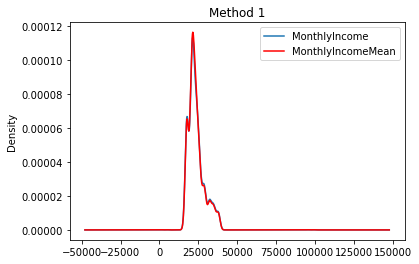

In [252]:
print(data['MonthlyIncome'].std())
print(data['MonthlyIncomeMean'].std())
fig = plt.figure()
ax = fig.add_subplot(111)
data['MonthlyIncome'].plot(kind='kde', ax=ax)
data.MonthlyIncomeMean.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.title('Method 1')

## Median Imputation as Outliers present in Monthly Income

<AxesSubplot:xlabel='MonthlyIncome'>

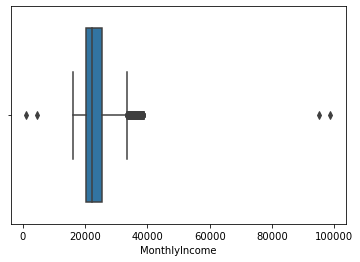

In [215]:
sns.boxplot(x='MonthlyIncome', data = data, orient='h')

In [216]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

median=data.MonthlyIncome.median()
median

22347.0

In [217]:
data['MonthlyIncome'].mean()

23619.85349087003

In [218]:
impute_nan(data,'MonthlyIncome',median)
data.head()


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,MonthlyIncomeMean,MonthlyIncome_median
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,Single,1.0,1,2,1,0.0,Manager,20993.0,20993.0,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,...,Divorced,2.0,0,3,1,2.0,Manager,20130.0,20130.0,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,Single,7.0,1,3,0,0.0,Executive,17090.0,17090.0,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,...,Divorced,2.0,1,5,1,1.0,Executive,17909.0,17909.0,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,Divorced,1.0,0,5,1,0.0,Executive,18468.0,18468.0,18468.0


5380.698360691633
5270.6429546836


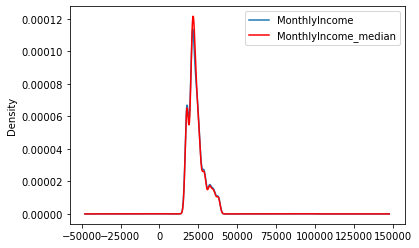

In [219]:
print(data['MonthlyIncome'].std())
print(data['MonthlyIncome_median'].std())
fig = plt.figure()
ax = fig.add_subplot(111)
data['MonthlyIncome'].plot(kind='kde', ax=ax)
data.MonthlyIncome_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [257]:
# dropping column 'MonthlyIncome' and 'MonthlyIncome_median', keeping 'MonthlyIncomeMean'
data = data.drop(axis=1,columns=['MonthlyIncomeMean','MonthlyIncome'])
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome_median,DurationOfPitch_mean,Age_median,Age_mean
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,1.0,1,2,1,0.0,Manager,20993.0,6.0,41.0,41.0000
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,...,2.0,0,3,1,2.0,Manager,20130.0,14.0,49.0,49.0000
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,7.0,1,3,0,0.0,Executive,17090.0,8.0,37.0,37.0000
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,...,2.0,1,5,1,1.0,Executive,17909.0,9.0,33.0,33.0000
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,1.0,0,5,1,0.0,Executive,18468.0,8.0,36.0,33.0859


## Applying the same approach to filling "DurationOfPitch" and "Age"

<AxesSubplot:xlabel='DurationOfPitch', ylabel='Designation'>

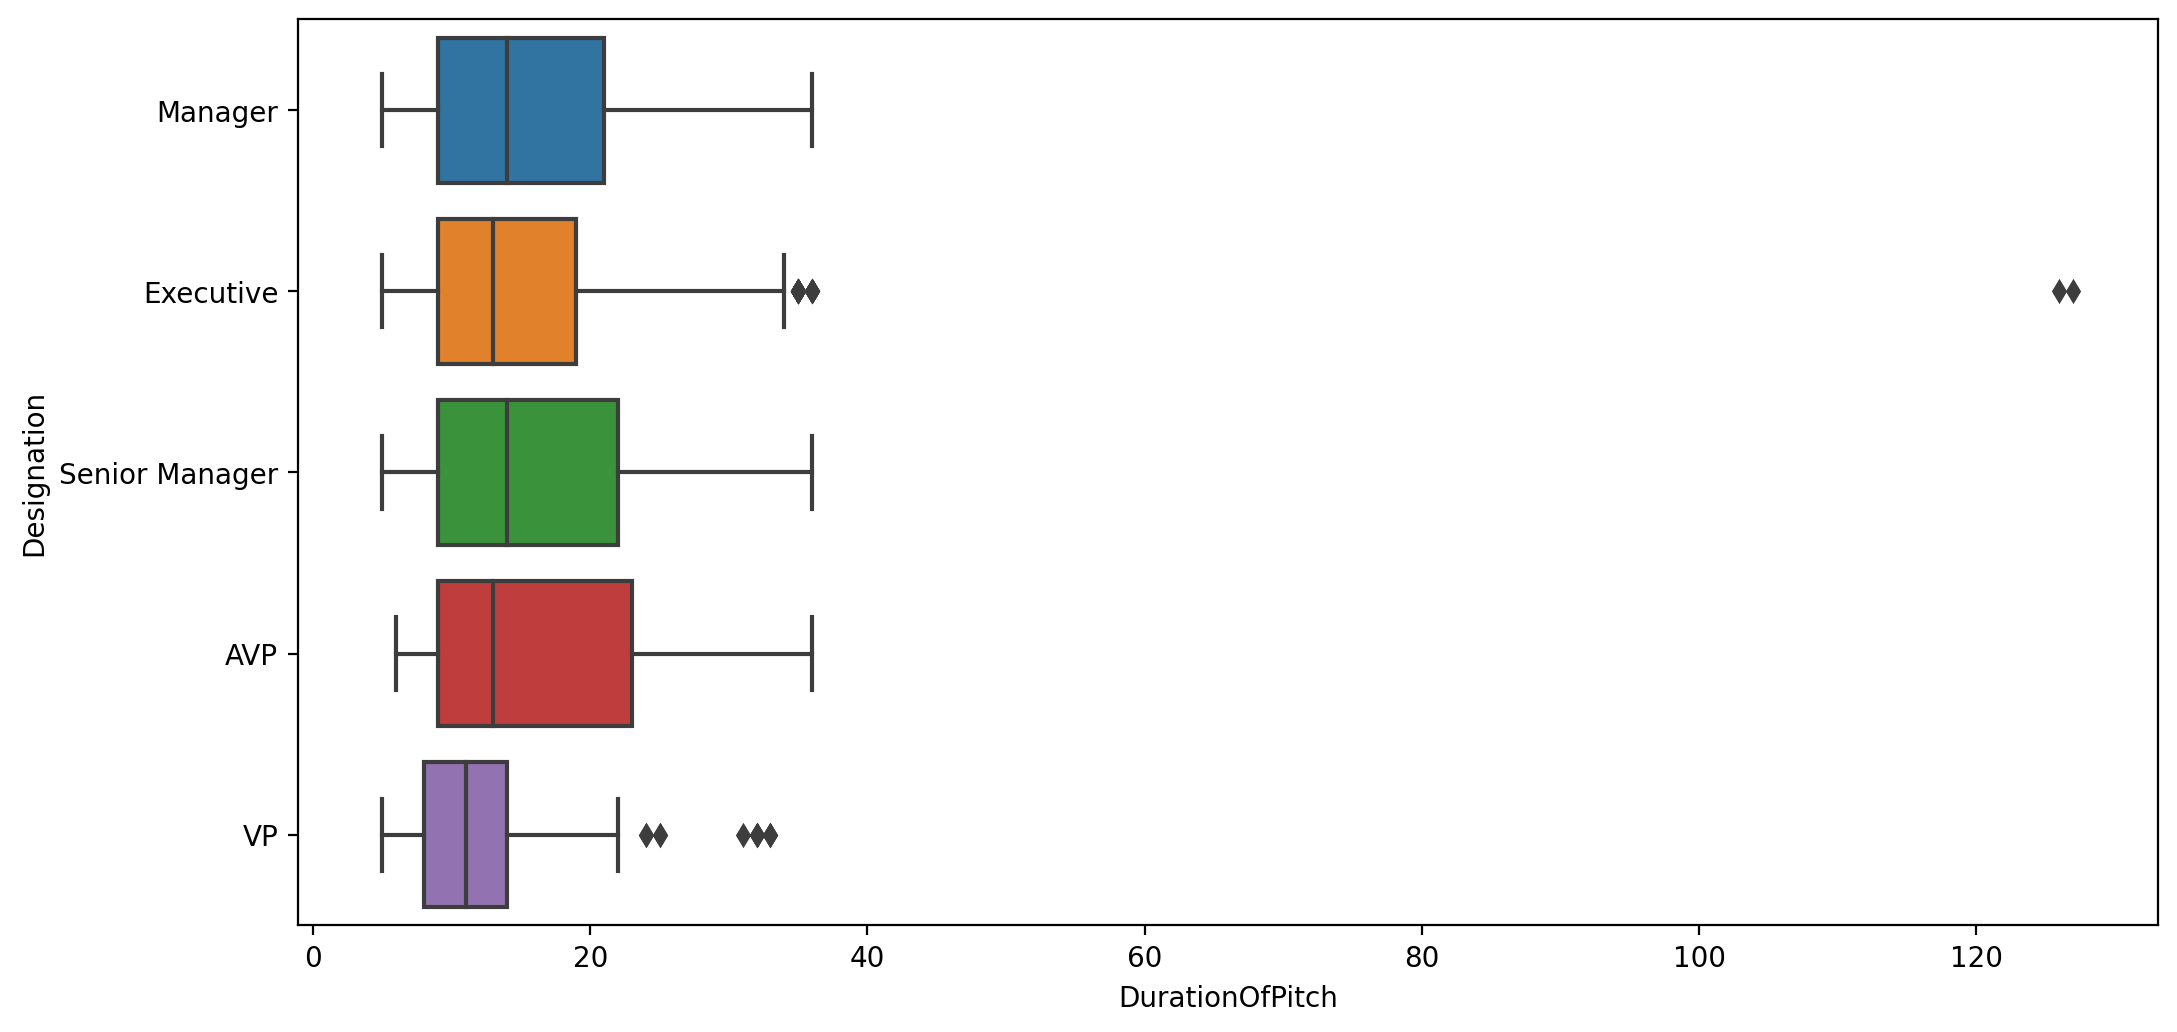

In [220]:
plt.figure(figsize=(12,6), dpi= 200)
sns.boxplot(x='DurationOfPitch', y='Designation', data = data, orient='h')

<AxesSubplot:xlabel='DurationOfPitch'>

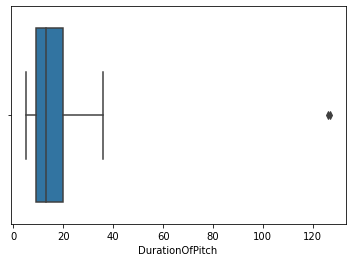

In [221]:
sns.boxplot(x='DurationOfPitch', data = data, orient='h')

In [222]:
data['DurationOfPitch'].median()

13.0

In [223]:
data['DurationOfPitch'].mean()

15.490834591330602

In [224]:
# Mean of Duration of Pitch grouped by Designation
data.groupby('Designation')['DurationOfPitch'].mean()

Designation
AVP               16.230994
Executive         15.194834
Manager           15.935839
Senior Manager    15.986505
VP                12.100000
Name: DurationOfPitch, dtype: float64

In [225]:
# pandas transformation method: groupby call + apply method
data['DurationOfPitch_mean'] = data.groupby('Designation')['DurationOfPitch'].transform(lambda value: value.fillna(value.mean()))
# filling in missing values in monthly income based of the designation.

8.519642589404338
8.319751689675508


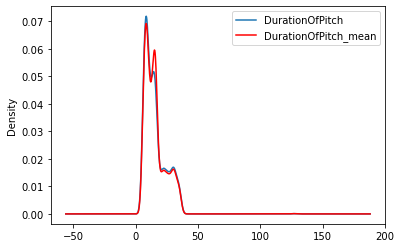

In [229]:
print(data['DurationOfPitch'].std())
print(data['DurationOfPitch_mean'].std())
fig = plt.figure()
ax = fig.add_subplot(111)
data['DurationOfPitch'].plot(kind='kde', ax=ax)
data.DurationOfPitch_mean.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [259]:
# dropping column 'DurationOfPitch' , keeping 'DurationOfPitch_mean'
data = data.drop(axis=1,columns=['DurationOfPitch'])
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome_median,DurationOfPitch_mean,Age_median,Age_mean
0,200000,1,41.0,Self Enquiry,3,Salaried,Female,3,3.0,Deluxe,...,1.0,1,2,1,0.0,Manager,20993.0,6.0,41.0,41.0000
1,200001,0,49.0,Company Invited,1,Salaried,Male,3,4.0,Deluxe,...,2.0,0,3,1,2.0,Manager,20130.0,14.0,49.0,49.0000
2,200002,1,37.0,Self Enquiry,1,Free Lancer,Male,3,4.0,Basic,...,7.0,1,3,0,0.0,Executive,17090.0,8.0,37.0,37.0000
3,200003,0,33.0,Company Invited,1,Salaried,Female,2,3.0,Basic,...,2.0,1,5,1,1.0,Executive,17909.0,9.0,33.0,33.0000
4,200004,0,NaN,Self Enquiry,1,Small Business,Male,2,3.0,Basic,...,1.0,0,5,1,0.0,Executive,18468.0,8.0,36.0,33.0859


## Filling the missing values in Age Feature 

In [230]:
data['Age'].describe()

count    4637.000000
mean       37.662929
std         9.317154
min        18.000000
25%        31.000000
50%        36.000000
75%        44.000000
max        61.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age'>

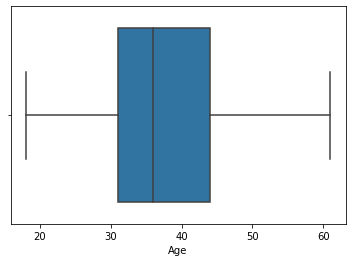

In [231]:
sns.boxplot(x='Age', data = data, orient='h')

In [232]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

median=data.Age.median()
median

36.0

In [233]:
impute_nan(data,'Age',median)

## Compairing the distribution between original and imputed distributions

9.317153660637478
9.104766135399016


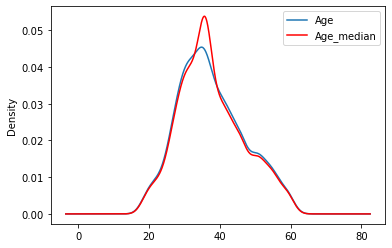

In [236]:
print(data['Age'].std())
print(data['Age_median'].std())
fig = plt.figure()
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde', ax=ax)
data.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## Filling the missng values in Age feature grouping by Designation

<AxesSubplot:xlabel='Age', ylabel='Designation'>

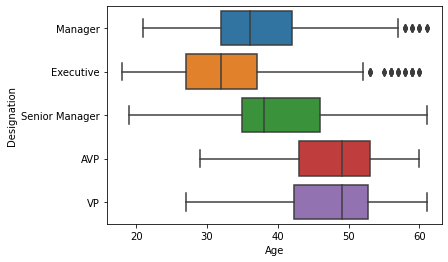

In [237]:
sns.boxplot(x='Age', y='Designation', data = data, orient='h')

In [238]:
data['Age'].median()

36.0

In [239]:
data['Age'].mean()

37.662928617640716

In [240]:
data.groupby('Designation')['Age'].mean()

Designation
AVP               48.026316
Executive         33.085900
Manager           37.434597
Senior Manager    40.581646
VP                48.065217
Name: Age, dtype: float64

In [241]:
# pandas transformation method: groupby call + apply method
data['Age_mean'] = data.groupby('Designation')['Age'].transform(lambda value: value.fillna(value.mean()))
# filling in missing values in monthly income based of the designation.

9.317153660637478
9.131157103622403


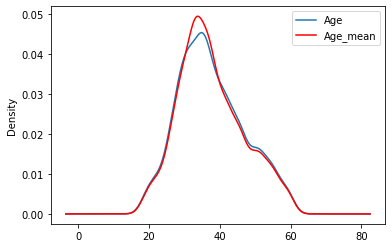

In [244]:
print(data['Age'].std())
print(data['Age_mean'].std())
fig = plt.figure()
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde', ax=ax)
data.Age_mean.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [261]:
# dropping column 'Age' and 'Age_median', keeping 'Age_mean'
data = data.drop(axis=1,columns=['Age','Age_median'])
data.head()

,CustomerID,ProdTaken,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome_median,DurationOfPitch_mean,Age_mean
0,200000,1,Self Enquiry,3,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,6.0,41.0000
1,200001,0,Company Invited,1,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,14.0,49.0000
2,200002,1,Self Enquiry,1,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,8.0,37.0000
3,200003,0,Company Invited,1,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,9.0,33.0000
4,200004,0,Self Enquiry,1,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,8.0,33.0859


In [263]:
data.isnull().sum()

CustomerID                  0
ProdTaken                   0
TypeofContact               0
CityTier                    0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome_median        0
DurationOfPitch_mean        0
Age_mean                    0
dtype: int64

In [269]:
## Saving dateset with no null values
data.to_csv('Travel_NoNull.csv')

# Random Sampling Imputation
- Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

- When should it be used? It assumes that the data are missing completely at random(MCAR)


[top](#handling-missing-values-in-travel-dataset-by-jyoti-pandey)

In [270]:
data= dataset.copy()
data['Age'].isnull().sum()

226

In [271]:
data['Age'].isnull().mean()

0.046235679214402615

In [274]:
226/4888

0.046235679214402615

### replace the missing values with the random samples

In [278]:
data['Age'].dropna().sample()

4421    30.0
Name: Age, dtype: float64

In [279]:
# number of missing values in 'Age'
data['Age'].isnull().sum()

226

In [280]:
# preparing a fixed sample of 226(i.e no of values missing) datapoints from age 

data['Age'].dropna().sample(data['Age'].isnull().sum(),random_state=0)

1037    45.0
580     35.0
2630    41.0
3437    26.0
3633    34.0
        ... 
3387    47.0
1192    49.0
3509    56.0
2849    26.0
3200    33.0
Name: Age, Length: 226, dtype: float64

In [284]:
def impute_nan(df,variable,median):
    # variable which fills the nan data with median
    df[variable+"_median"]=df[variable].fillna(median)
    # variable which randome values
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [285]:
data.Age.median()

36.0

In [286]:
impute_nan(data,"Age",median)

In [290]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Age_median,Age_random
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,Single,1.0,1,2,1,0.0,Manager,20993.0,41.0,41.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,...,Divorced,2.0,0,3,1,2.0,Manager,20130.0,49.0,49.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,Single,7.0,1,3,0,0.0,Executive,17090.0,37.0,37.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,...,Divorced,2.0,1,5,1,1.0,Executive,17909.0,33.0,33.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,Divorced,1.0,0,5,1,0.0,Executive,18468.0,36.0,45.0


In [291]:
data[['Age','Age_median','Age_random']]

,Age,Age_median,Age_random
0,41.0,41.0,41.0
1,49.0,49.0,49.0
2,37.0,37.0,37.0
3,33.0,33.0,33.0
4,NaN,36.0,45.0
...,...,...,...
4883,49.0,49.0,49.0
4884,28.0,28.0,28.0
4885,52.0,52.0,52.0
4886,19.0,19.0,19.0


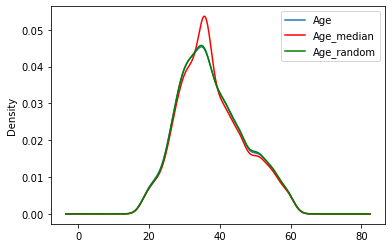

In [294]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde', ax=ax)
data.Age_median.plot(kind='kde', ax=ax, color='red')
data.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Capturing NAN values with a new feature

[top](#handling-missing-values-in-travel-dataset-by-jyoti-pandey)

In [317]:
data = dataset.copy()
data['Age'].isnull().sum()

226

In [318]:
# Create a new feature representing the null values with 1 otherwise 0.
data['Age_NAN']=numpy.where(data['Age'].isnull(),1,0)
data[['Age', 'Age_NAN']]

,Age,Age_NAN
0,41.0,0
1,49.0,0
2,37.0,0
3,33.0,0
4,NaN,1
...,...,...
4883,49.0,0
4884,28.0,0
4885,52.0,0
4886,19.0,0


In [319]:
data.Age.median()

36.0

In [320]:
# replace missing values, we have the info about missing in the new feature
data['Age'].fillna(data.Age.median(),inplace=True)
data[['Age', 'Age_NAN']]

,Age,Age_NAN
0,41.0,0
1,49.0,0
2,37.0,0
3,33.0,0
4,36.0,1
...,...,...
4883,49.0,0
4884,28.0,0
4885,52.0,0
4886,19.0,0


In [321]:
data['Age'].isnull().sum()

0

# End of Distribution imputation

[top](#handling-missing-values-in-travel-dataset-by-jyoti-pandey)

In [375]:
data = dataset.copy()
data['DurationOfPitch'].isnull().sum()

251

<AxesSubplot:xlabel='DurationOfPitch', ylabel='Count'>

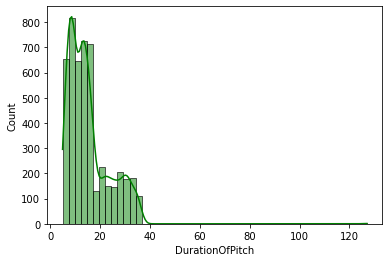

In [391]:
sns.histplot(data=data,x='DurationOfPitch',bins=50,kde=True,color='g')

In [387]:
# mean + third standard deviation RIGHT SIDE because outliers present in right side
extreme=data.DurationOfPitch.mean() + 3 * data.DurationOfPitch.std()
extreme

40.31142769237208

<AxesSubplot:xlabel='DurationOfPitch'>

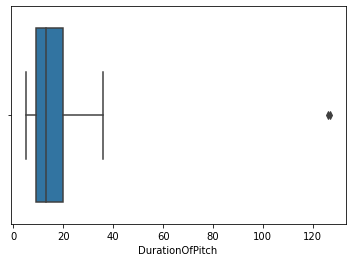

In [377]:
sns.boxplot('DurationOfPitch',data=data)

In [378]:
def impute_nan(df,variable,median,extreme):
    # fillna with extreme values and creationg a new feature
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [379]:
impute_nan(data,'DurationOfPitch',data.DurationOfPitch.median(),extreme)


In [380]:
data[['DurationOfPitch', 'DurationOfPitch_end_distribution']]

,DurationOfPitch,DurationOfPitch_end_distribution
0,6.0,6.0
1,14.0,14.0
2,8.0,8.0
3,9.0,9.0
4,8.0,8.0
...,...,...
4883,9.0,9.0
4884,31.0,31.0
4885,17.0,17.0
4886,16.0,16.0


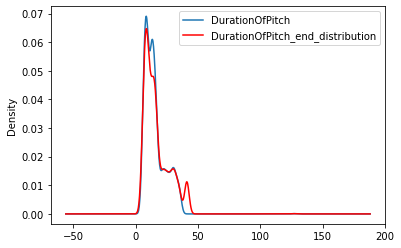

In [381]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['DurationOfPitch'].plot(kind='kde', ax=ax)
data.DurationOfPitch_end_distribution.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

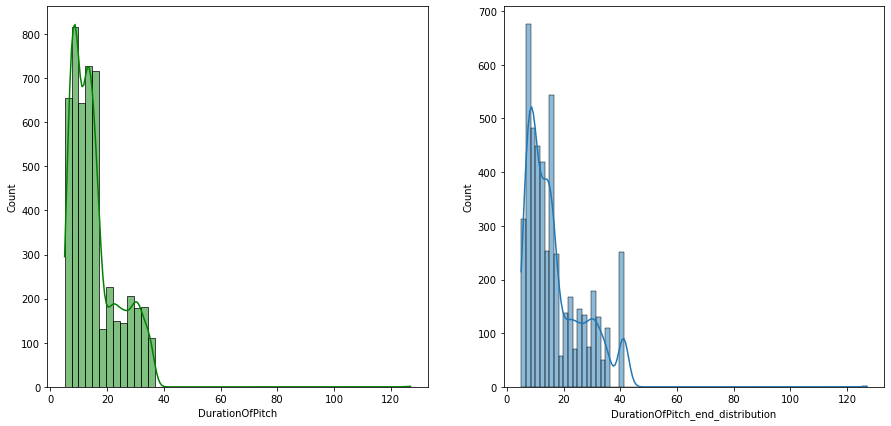

In [390]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='DurationOfPitch',bins=50,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='DurationOfPitch_end_distribution',kde=True)
plt.show()


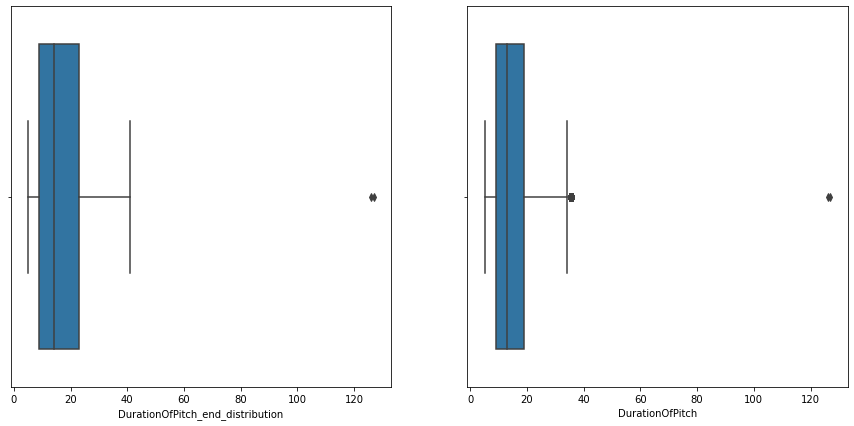

In [389]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.boxplot('DurationOfPitch_end_distribution',data=data)
plt.subplot(122)
sns.boxplot('DurationOfPitch',data=data)
plt.show()

# Arbitrary Value Imputation
- Arbitrarry values should not be frequently used.
- Last outlier value or least value from feature. Value which is completly outside of the main distribution.

[top](#handling-missing-values-in-travel-dataset-by-jyoti-pandey)

In [422]:
data= dataset.copy()
data['Age'].isnull().sum()

226

In [423]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

In [424]:
impute_nan(data,'Age')

In [425]:
data[['Age', 'Age_zero', 'Age_hundred']]

,Age,Age_zero,Age_hundred
0,41.0,41.0,41.0
1,49.0,49.0,49.0
2,37.0,37.0,37.0
3,33.0,33.0,33.0
4,NaN,0.0,100.0
...,...,...,...
4883,49.0,49.0,49.0
4884,28.0,28.0,28.0
4885,52.0,52.0,52.0
4886,19.0,19.0,19.0


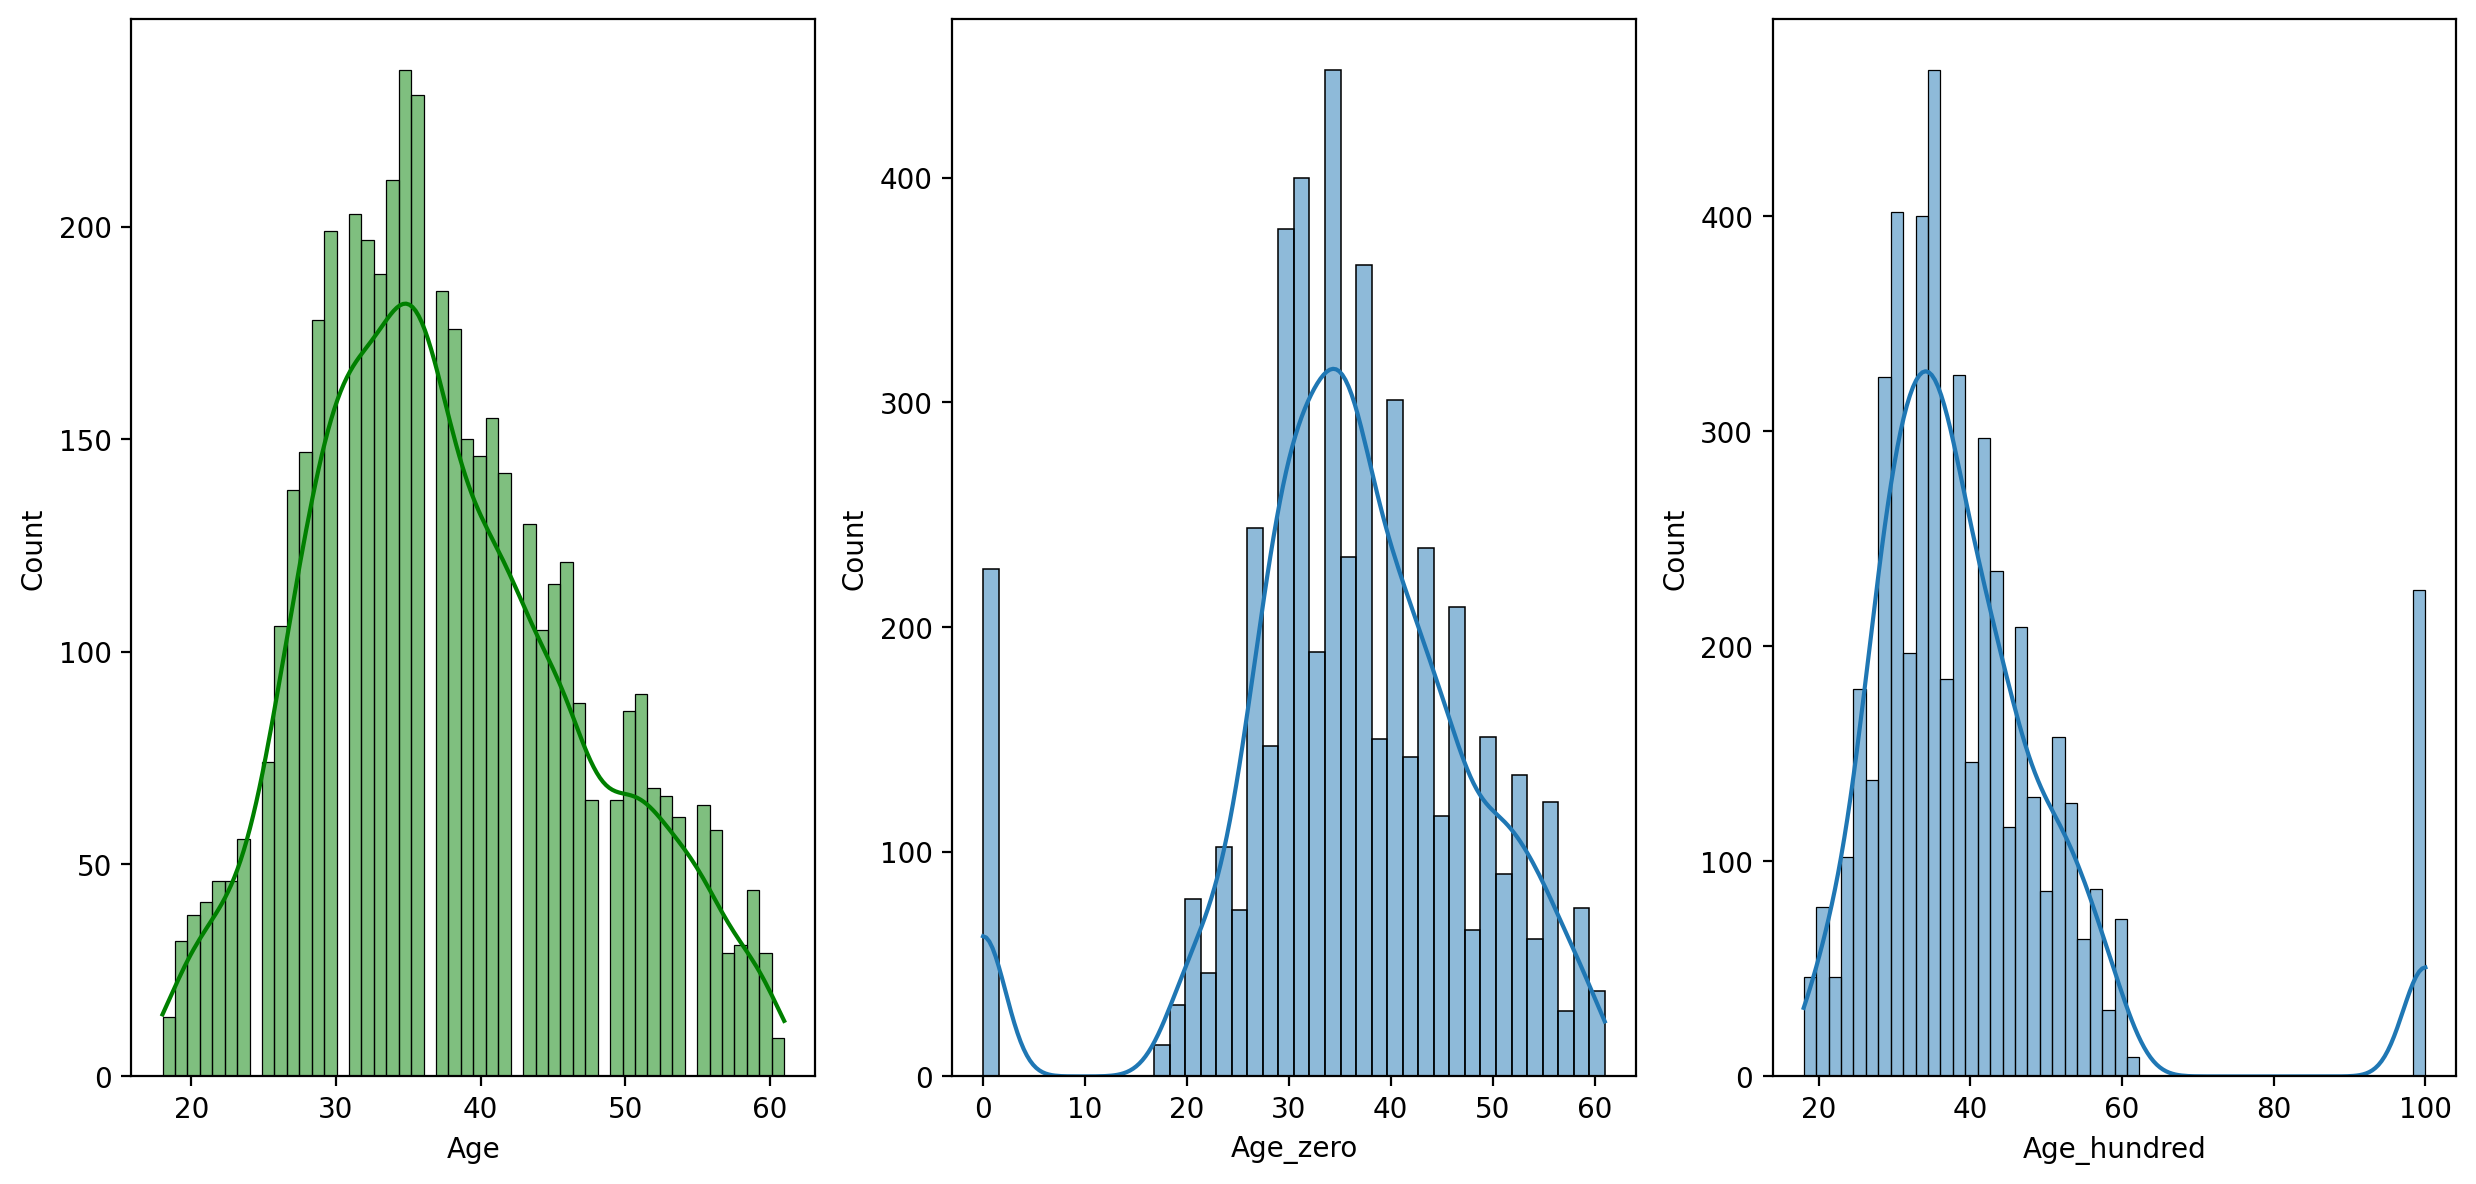

In [426]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7),dpi = 200)
plt.subplot(131)
sns.histplot(data=data,x='Age',bins=50,kde=True,color='g')
plt.subplot(132)
sns.histplot(data=data,x='Age_zero',kde=True)
plt.subplot(133)
sns.histplot(data=data,x='Age_hundred',kde=True)
plt.show()


# How To Handle Categorical Missing Values

[top](#handling-missing-values-in-travel-dataset-by-jyoti-pandey)

## Frequent Category Imputation

In [403]:
data= dataset.copy()
# categorical feature with missing values
percent_nan_cat = percentage_missing(data[categorical_features])
percent_nan_cat

TypeofContact    0.511457
dtype: float64

In [404]:
data.TypeofContact.isnull().sum()

25

Prefer to delete the records but just to understand the handling missing values in categorical_features.

Make sure we have less number of missing values in categorical_features to adopt this technique.

In [405]:
data.TypeofContact.unique()

array(['Self Enquiry', 'Company Invited', nan], dtype=object)

Compute the frequency with every categorical feature

<AxesSubplot:>

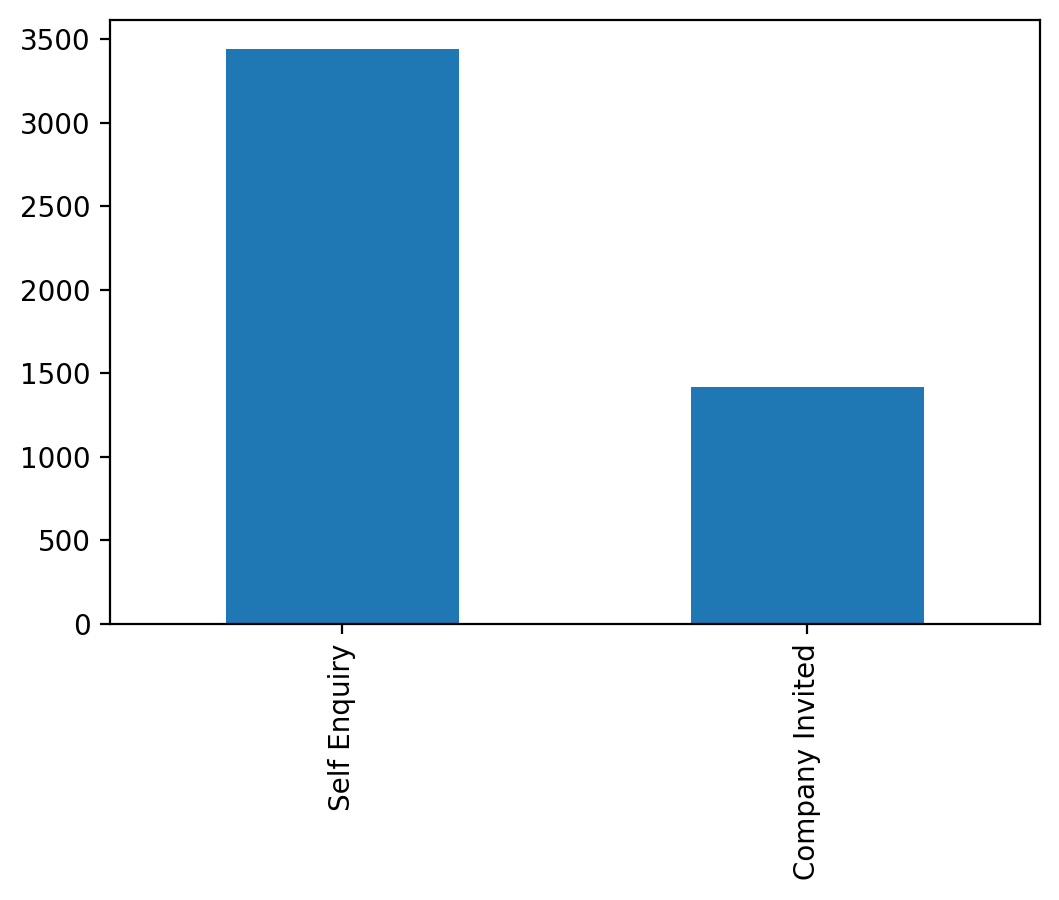

In [420]:
#Compute the frequency with every feature
plt.figure(dpi=200)
data.TypeofContact.value_counts().plot.bar()

In [409]:
data.groupby(['TypeofContact'])['TypeofContact'].count()

TypeofContact
Company Invited    1419
Self Enquiry       3444
Name: TypeofContact, dtype: int64

<AxesSubplot:xlabel='TypeofContact'>

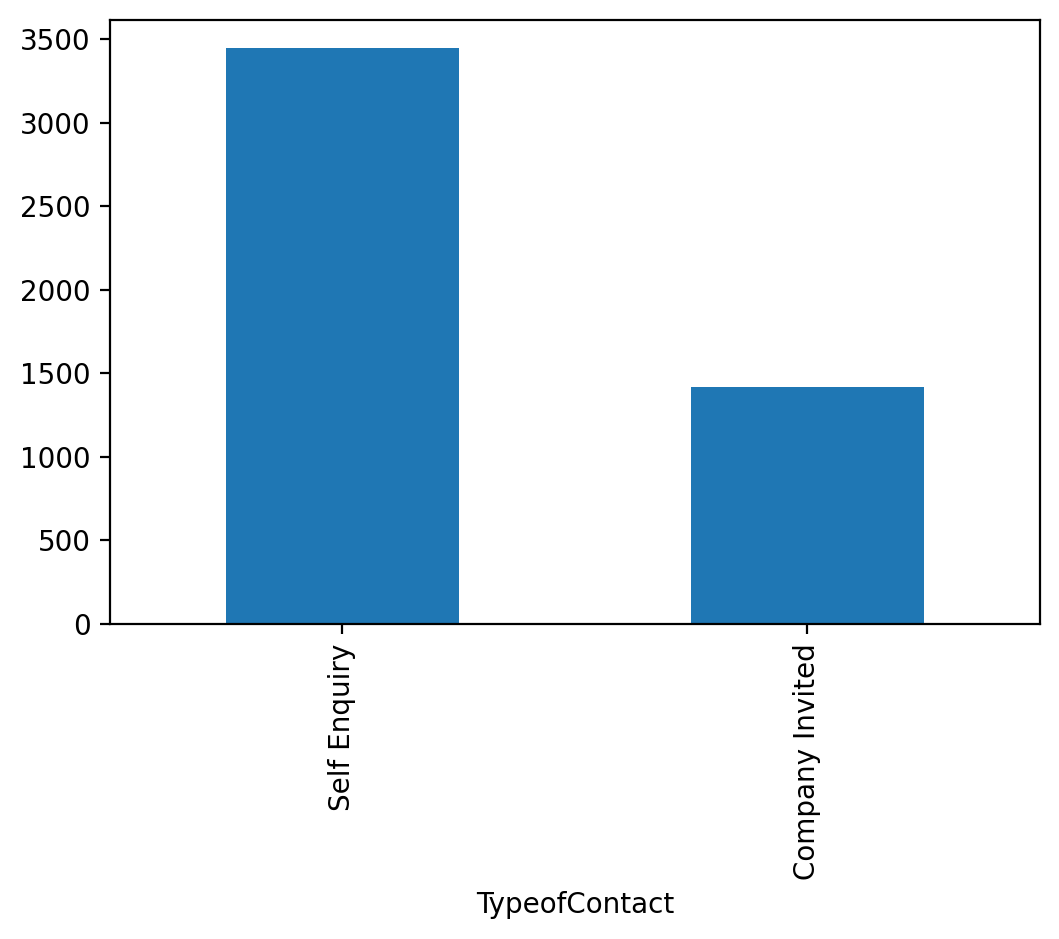

In [419]:
plt.figure(figsize=(6,4),dpi=200)
data.groupby(['TypeofContact'])['TypeofContact'].count().sort_values(ascending= False).plot.bar()

<AxesSubplot:xlabel='TypeofContact', ylabel='count'>

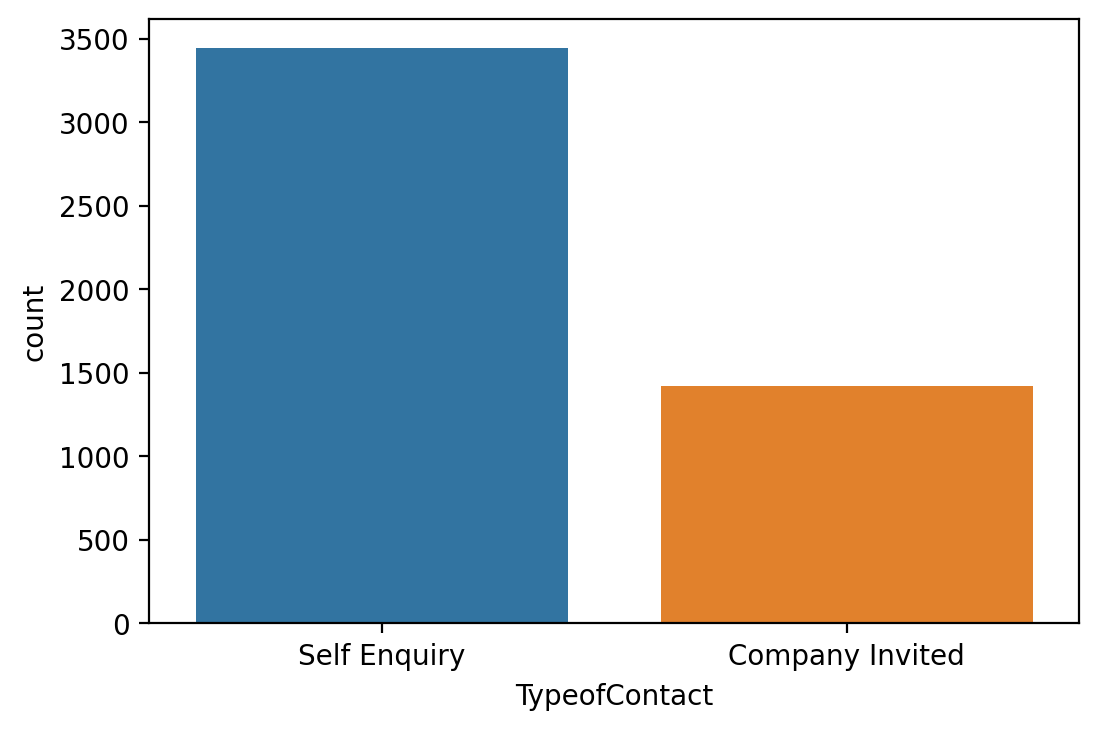

In [415]:
plt.figure(figsize=(6,4),dpi=200)
sns.countplot(data=data, x = 'TypeofContact')

Most frequent category

In [427]:
data.TypeofContact.value_counts().index[0]

'Self Enquiry'

In [430]:
data.TypeofContact.mode()[0]

'Self Enquiry'

Impute Function for the most frequent

In [435]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [448]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].value_count().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [449]:
percent_nan_cat = percentage_missing(data[categorical_features])
percent_nan_cat.index

Index([], dtype='object')

In [450]:
for feature in percent_nan_cat.index:
    impute_nan(data,feature)

In [451]:
data.TypeofContact.isnull().sum()

0

In [452]:
data[categorical_features].isnull().sum()

TypeofContact     0
Occupation        0
Gender            0
ProductPitched    0
MaritalStatus     0
Designation       0
dtype: int64

## Adding a variable to capture NAN

In [470]:
data= dataset.copy()
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [471]:
data[categorical_features].isnull().sum()

TypeofContact     25
Occupation         0
Gender             0
ProductPitched     0
MaritalStatus      0
Designation        0
dtype: int64

In [472]:
data['TypeofContact_null']=numpy.where(data['TypeofContact'].isnull(),1,0)

In [473]:
data[['TypeofContact','TypeofContact_null']]

,TypeofContact,TypeofContact_null
0,Self Enquiry,0
1,Company Invited,0
2,Self Enquiry,0
3,Company Invited,0
4,Self Enquiry,0
...,...,...
4883,Self Enquiry,0
4884,Company Invited,0
4885,Self Enquiry,0
4886,Self Enquiry,0


In [475]:
frequent = data['TypeofContact'].mode()[0]
data['TypeofContact'].fillna(frequent,inplace=True)
data['TypeofContact'].isnull().sum()

0

## Suppose if you have more frequent categories, we just replace NAN with a new category "Missing"

[top](#handling-missing-values-in-travel-dataset-by-jyoti-pandey)

In [482]:
data= dataset.copy()
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [483]:
data['TypeofContact'].isnull().sum()

25

In [484]:
def impute_nan(df,variable):
    df[variable+"newvar"]=numpy.where(df[variable].isnull(),"Missing",df[variable])

In [485]:
percent_nan_cat = percentage_missing(data[categorical_features])
for feature in percent_nan_cat.index:
    impute_nan(data,feature)

In [492]:
data['TypeofContact'].unique()

array(['Self Enquiry', 'Company Invited', nan], dtype=object)

In [491]:
data['TypeofContactnewvar'].unique()

array(['Self Enquiry', 'Company Invited', 'Missing'], dtype=object)

In [489]:
data['TypeofContact'].isnull().sum()

25

In [493]:
data=data.drop(['TypeofContact'],axis=1)
data.head()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TypeofContactnewvar
0,200000,1,41.0,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,Self Enquiry
1,200001,0,49.0,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,Company Invited
2,200002,1,37.0,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,Self Enquiry
3,200003,0,33.0,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,Company Invited
4,200004,0,NaN,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,Self Enquiry
